In [154]:
from keras import Sequential
from keras.layers import Dense,Flatten
import pandas as pd

In [155]:
df=pd.read_csv("insurance.csv")

In [156]:
df

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92000,False,Jaipur,retired,High
1,36,101.1,1.83,34.28000,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64000,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34000,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94000,True,Indore,retired,High
...,...,...,...,...,...,...,...,...
95,36,52.8,1.57,19.64000,False,Indore,business_owner,Low
96,26,113.8,1.54,34.01000,False,Delhi,private_job,Low
97,52,60.8,1.80,44.86000,False,Hyderabad,freelancer,Low
98,27,101.1,1.82,28.30000,False,Kolkata,business_owner,Low


In [157]:
df.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


In [158]:
new_df = df.drop(columns=["occupation"])
new_df = pd.get_dummies(new_df, columns=['smoker', "city"], drop_first=True)
new_df.rename(columns={"smoker_True": "smoker"}, inplace=True)
category_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
new_df["insurance_premium_category"] = new_df["insurance_premium_category"].map(category_mapping)
y = new_df["insurance_premium_category"]
x = new_df.drop(columns=['insurance_premium_category'])

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [160]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [161]:
import tensorflow
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense





In [171]:
model=Sequential()
model.add(Dense(5,input_dim=len(x.columns),activation="relu"))
model.add(Dense(11,activation='relu'))
model.add(Dense(3, activation='softmax'))


/Users/owner/Desktop/FastAPI/myvenv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [172]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 5)              │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (808.00 B)

 Trainable params: 202 (808.00 B)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [176]:
info = model.fit(x_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5938 - loss: 0.9366 - val_accuracy: 0.5625 - val_loss: 0.9327
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5938 - loss: 0.9339 - val_accuracy: 0.5625 - val_loss: 0.9304
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5938 - loss: 0.9314 - val_accuracy: 0.5625 - val_loss: 0.9284
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5938 - loss: 0.9290 - val_accuracy: 0.5625 - val_loss: 0.9264
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5938 - loss: 0.9266 - val_accuracy: 0.5625 - val_loss: 0.9246
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6094 - loss: 0.9242 - val_accuracy: 0.5625 - val_loss: 0.9228
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6094 - loss: 0.9218 - val_accuracy: 0.5625 - val_loss: 0.9208
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6094 - loss: 0.9194 - val_accuracy: 0.5000 - val_loss:

In [181]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)
accuracy_score(y_test, y_pred_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


0.6

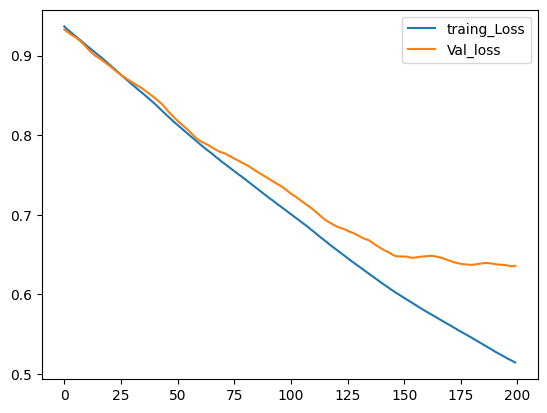

In [184]:
import matplotlib.pyplot as plt

plt.plot(info.history['loss'],label='traing_Loss')
plt.plot(info.history['val_loss'],label='Val_loss')
plt.legend()

In [185]:
model.save('my_model.h5')